In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [128]:
#Read the data
import pandas as pd

try:
  # Attempt to read with utf-8 encoding (might fail)
  toyota = pd.read_csv('ToyotaCorolla.csv', encoding='utf-8')
except UnicodeDecodeError:
  # If fails, try latin-1 encoding
  toyota = pd.read_csv('ToyotaCorolla.csv', encoding='latin-1')

In [129]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [130]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

toyota_df = toyota.loc[:, ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]

In [131]:
toyota_df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [132]:
toyota_df.head(20)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
5,32,61000,90,2000,3,5,210,1170,12950
6,27,94612,90,2000,3,5,210,1245,16900
7,30,75889,90,2000,3,5,210,1245,18600
8,27,19700,192,1800,3,5,100,1185,21500
9,23,71138,69,1900,3,5,185,1105,12950


In [133]:
toyota_df.tail()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250
1435,76,1,110,1600,5,5,19,1114,6950


In [134]:
toyota_df.shape

(1436, 9)

In [135]:
toyota_df.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Price'],
      dtype='object')

In [136]:
toyota_df.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [137]:
toyota_df.size

12924

In [138]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [139]:
toyota_df.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [140]:
toyota_df.isnull().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

# **Correlation Matrix**

In [141]:
toyota_df.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


# **Scatterplot** **between** **variables** **along** **with** **histograms**

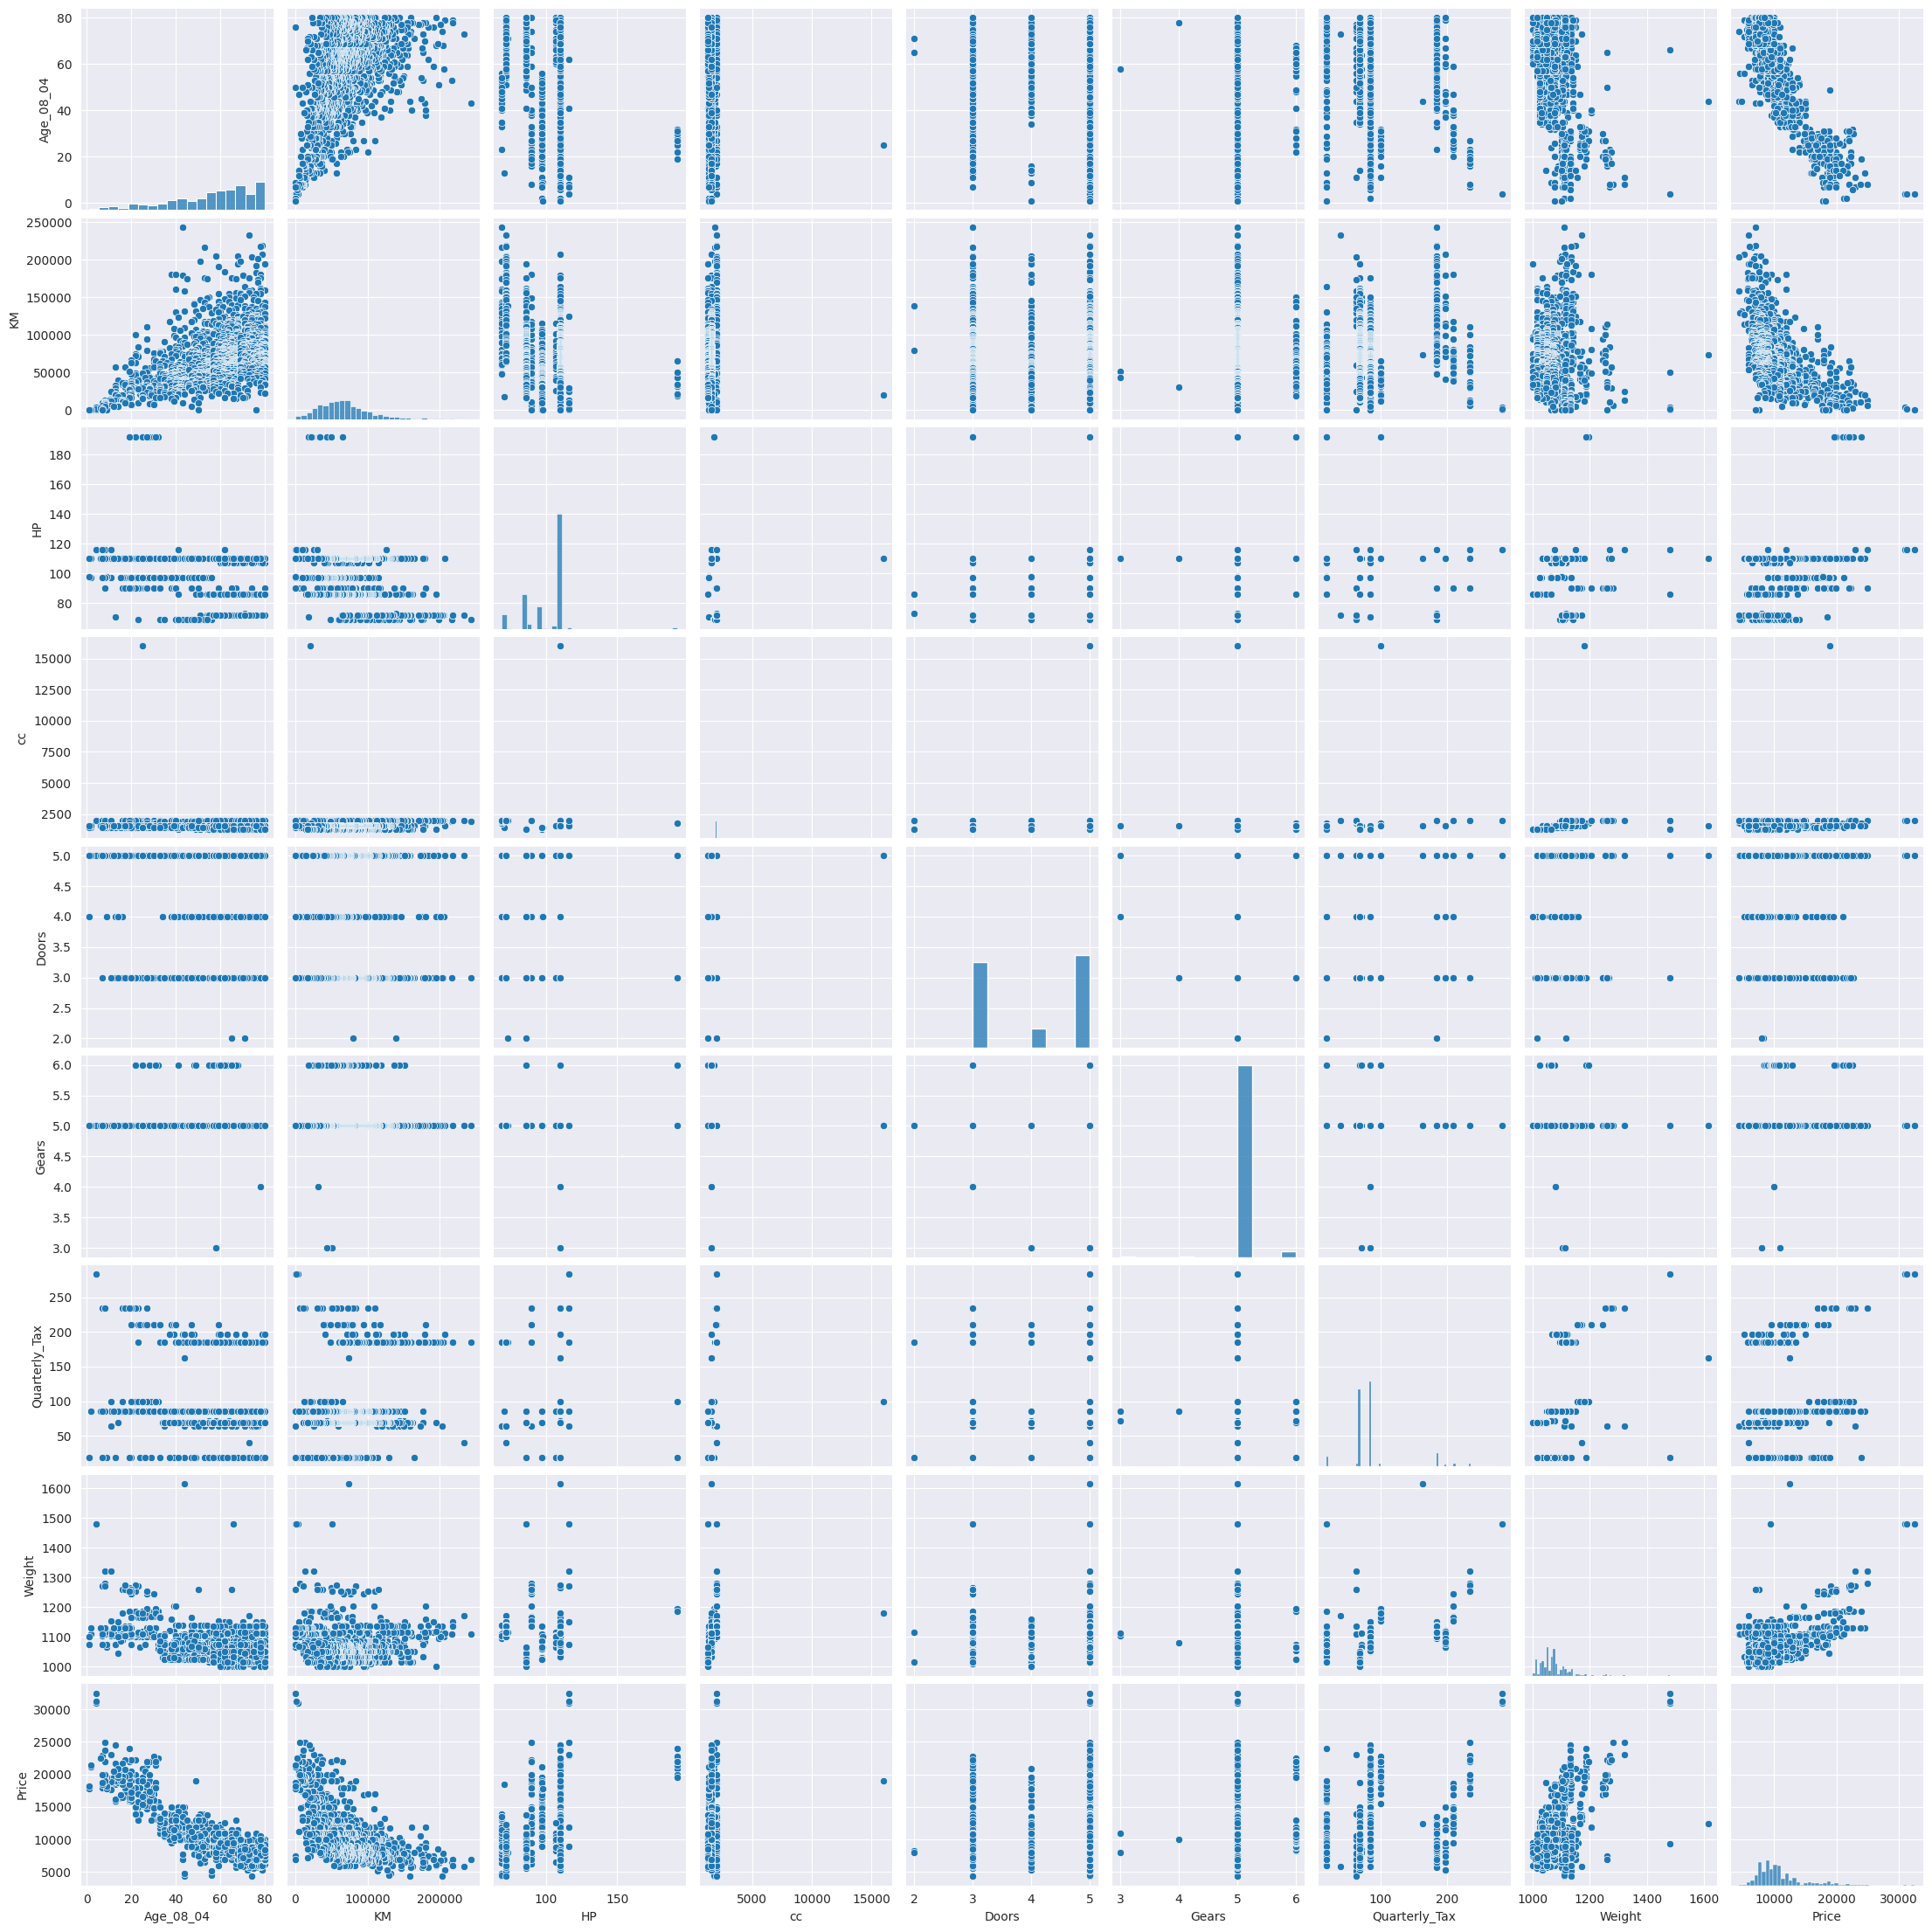

In [142]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota_df)

## **Preparing for model**

In [143]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit()

In [144]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [145]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [146]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [147]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:56:43   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Simple** **Linear** **Regression**

In [148]:
ml_doors=smf.ols('Price~Doors',data = toyota_df).fit()
#t and p-Values
print(ml_doors.tvalues, '\n', ml_doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [149]:
ml_cc=smf.ols('Price~cc',data = toyota_df).fit()
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [150]:
ml_cc_doors=smf.ols('Price~Doors+cc',data = toyota_df).fit()
print(ml_cc_doors.tvalues, '\n', ml_cc_doors.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


# **Calculating** **VIF**

In [151]:
toyota_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [152]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_Age = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~KM+HP+cc+Age_08_04+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Age_08_04+Weight',data=toyota_df).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax+Age_08_04',data=toyota_df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)



# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# **Residual Analysis**

# **Test for Normality of Residuals (Q-Q Plot)**

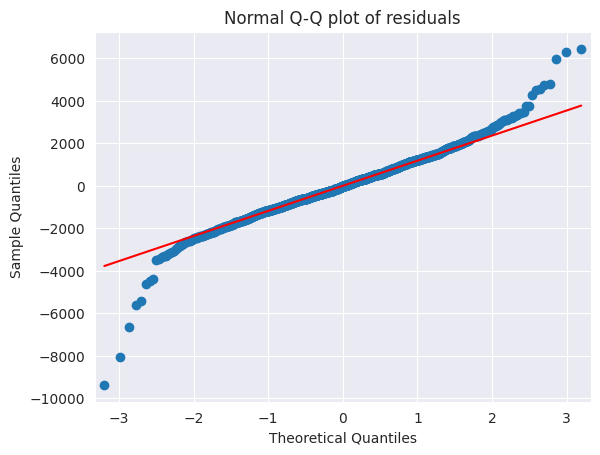

In [153]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [154]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

# **Residual Plot for Homoscedasticity**

In [155]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

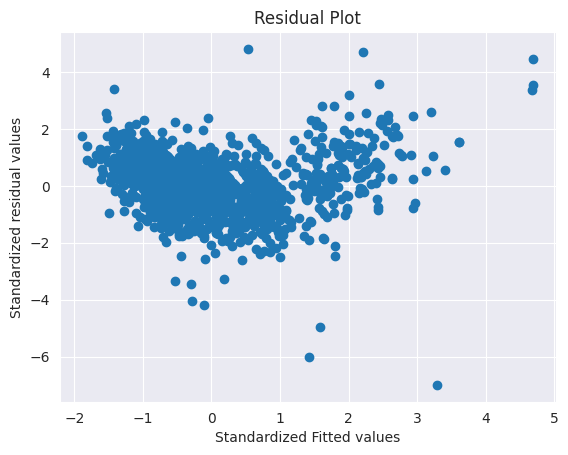

In [156]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()




# **Residual Vs Regressors**

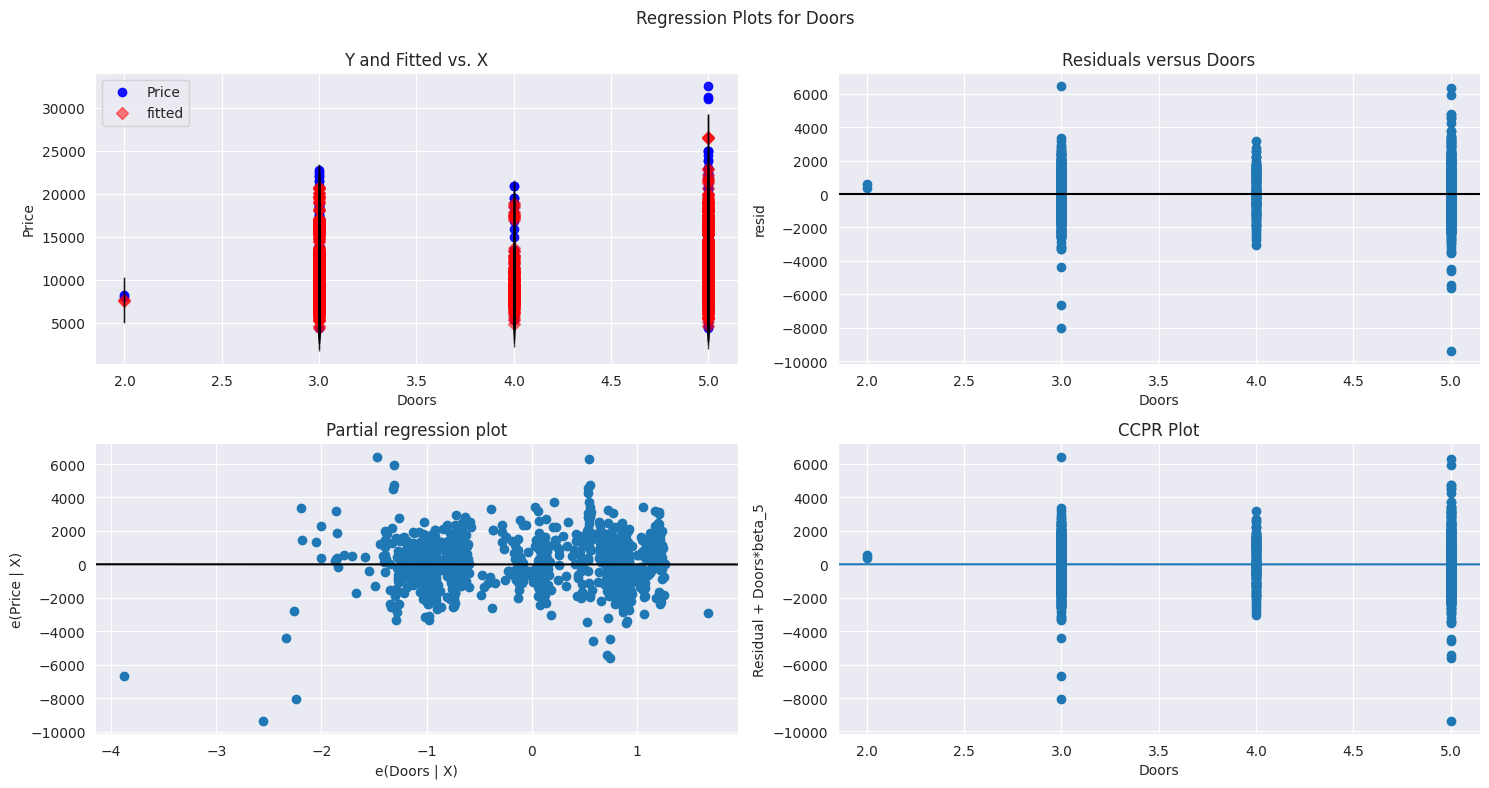

In [157]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

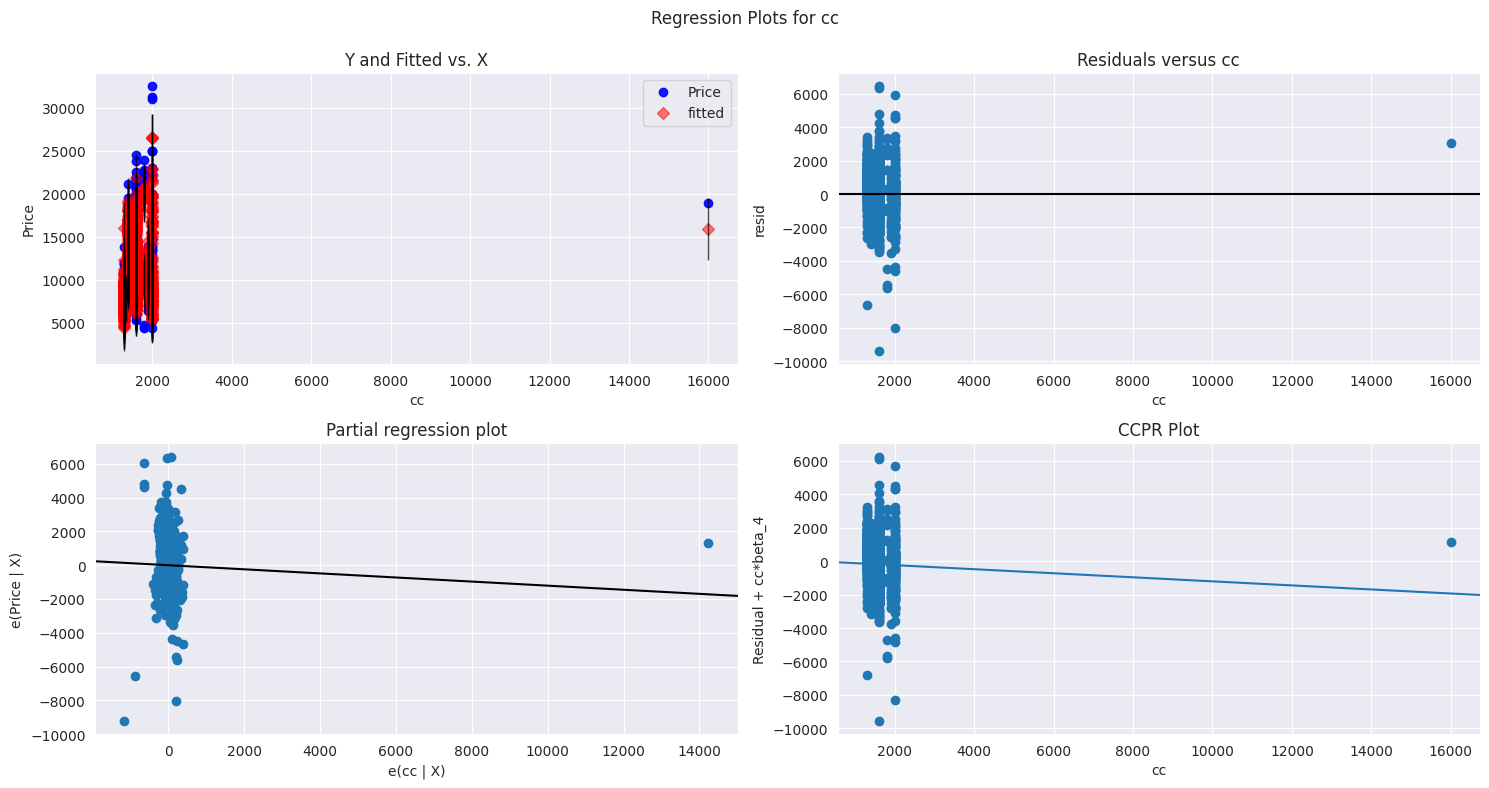

In [158]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

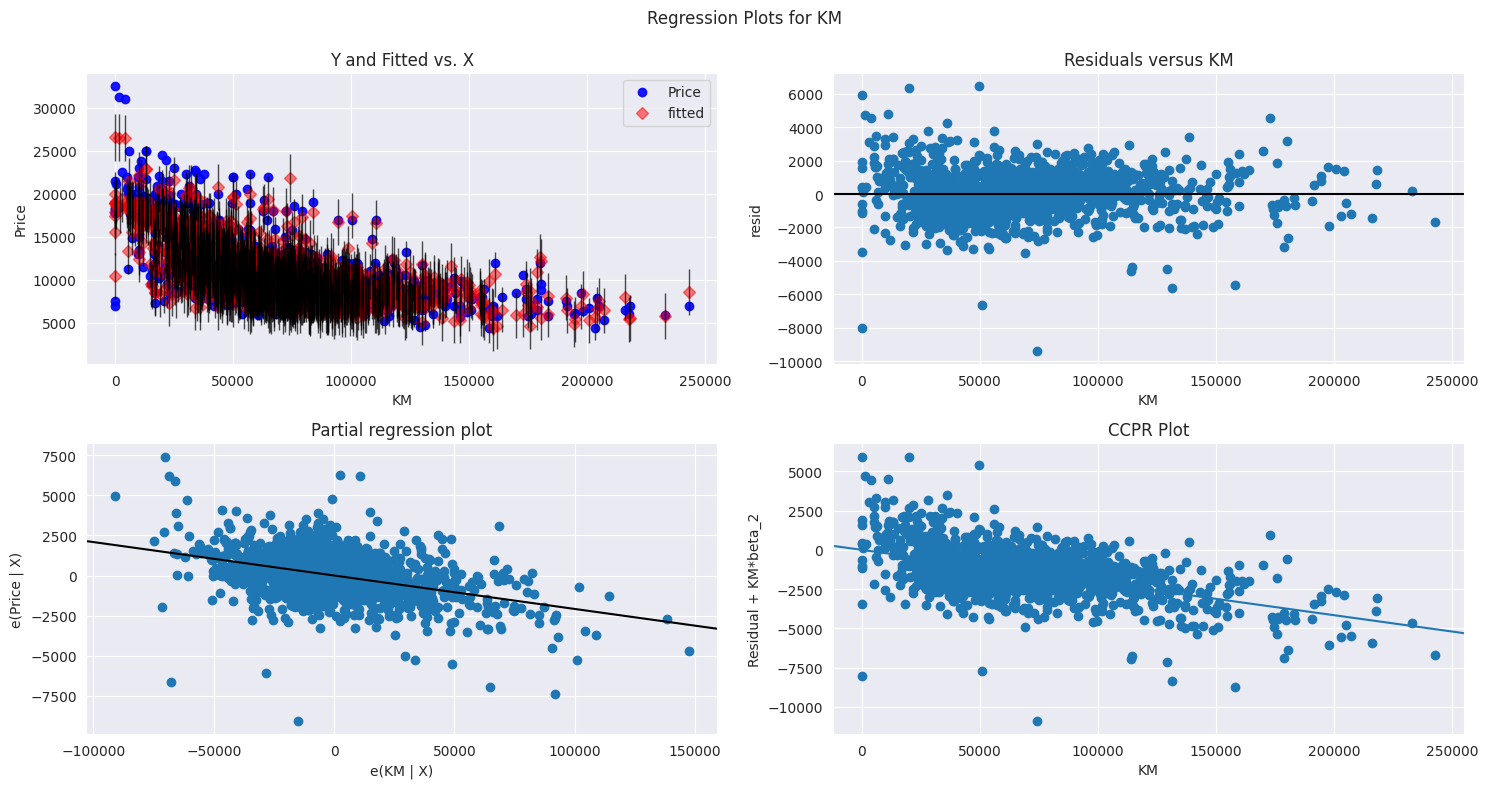

In [159]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

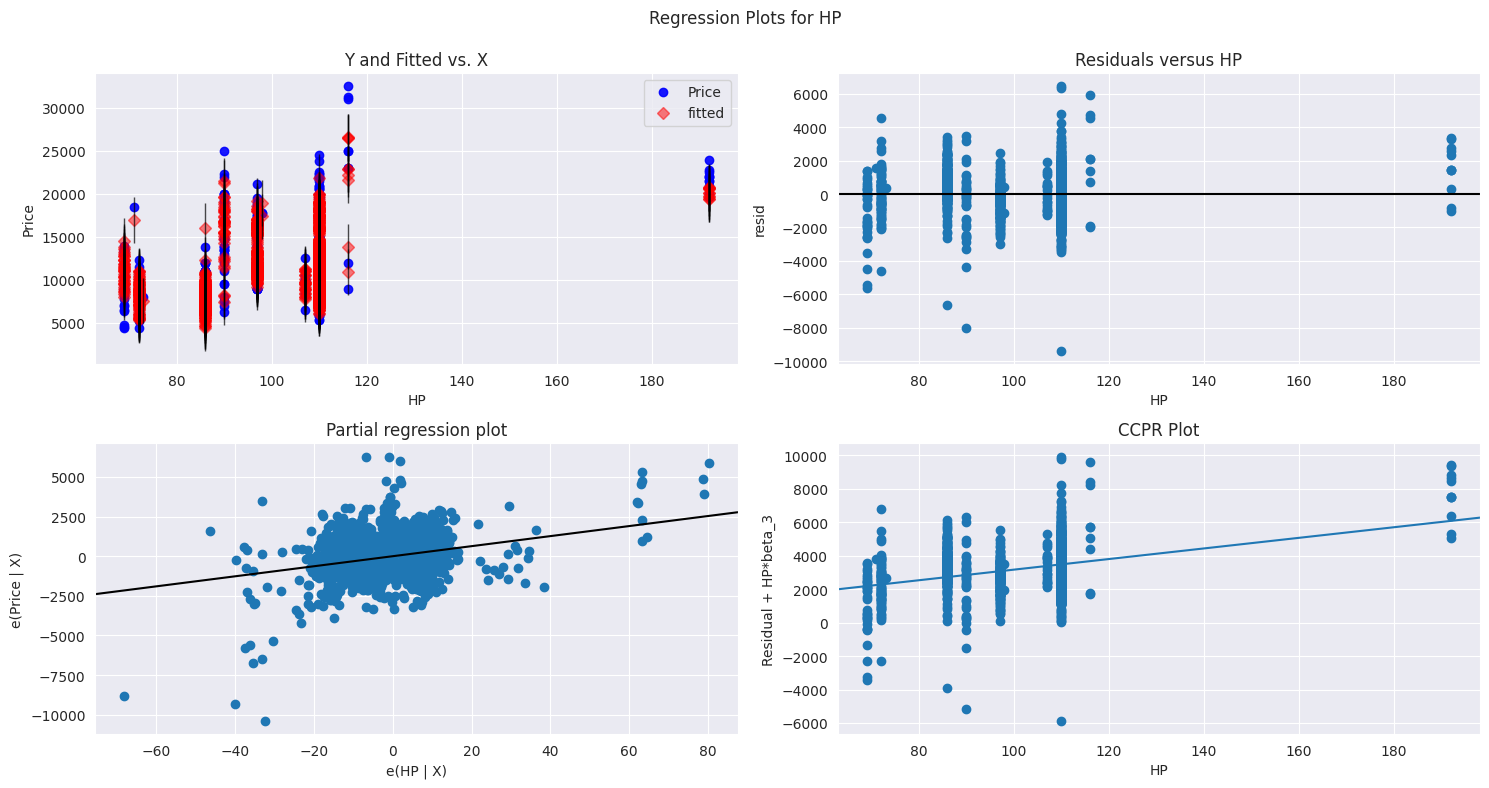

In [160]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

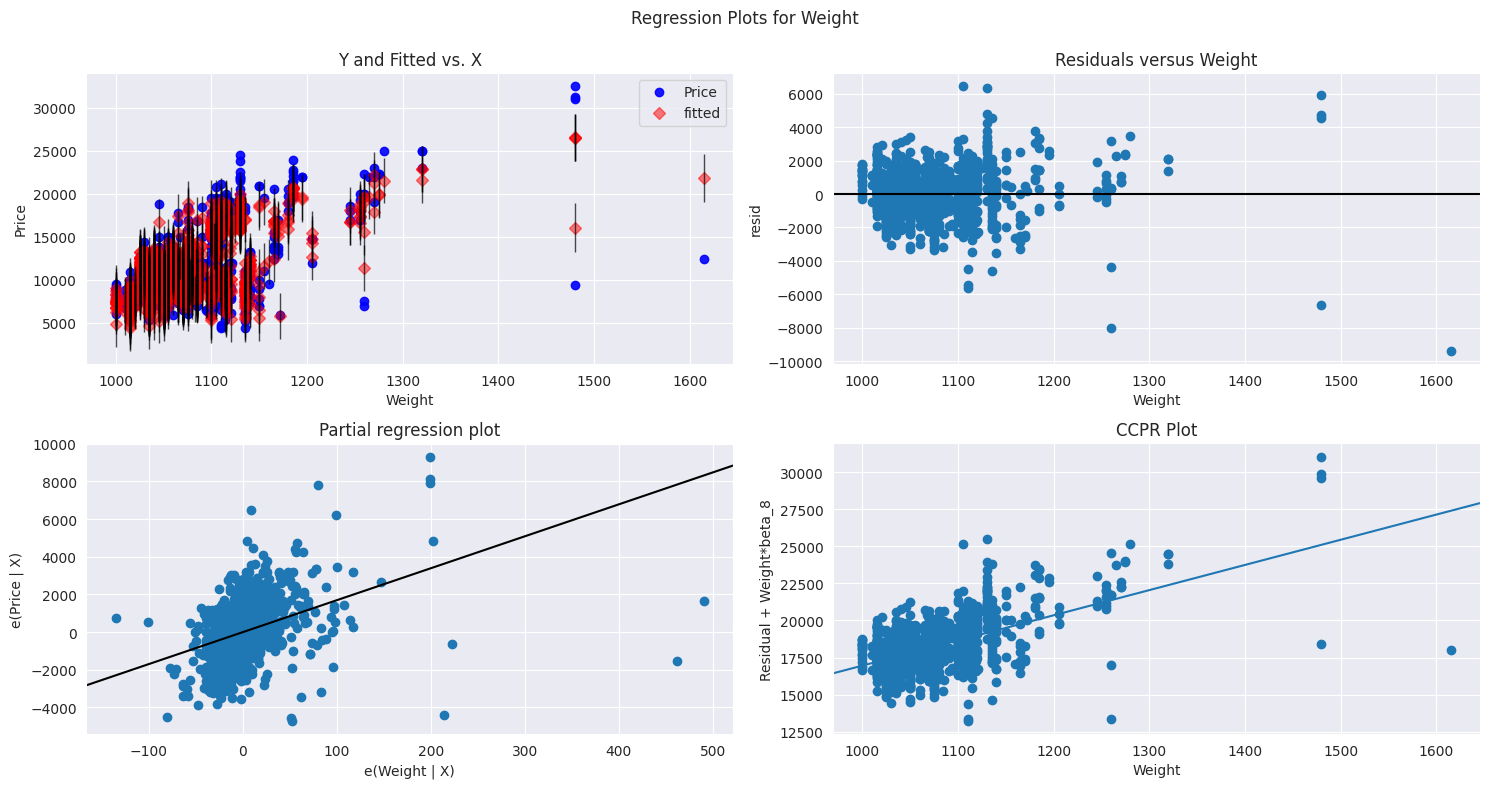

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

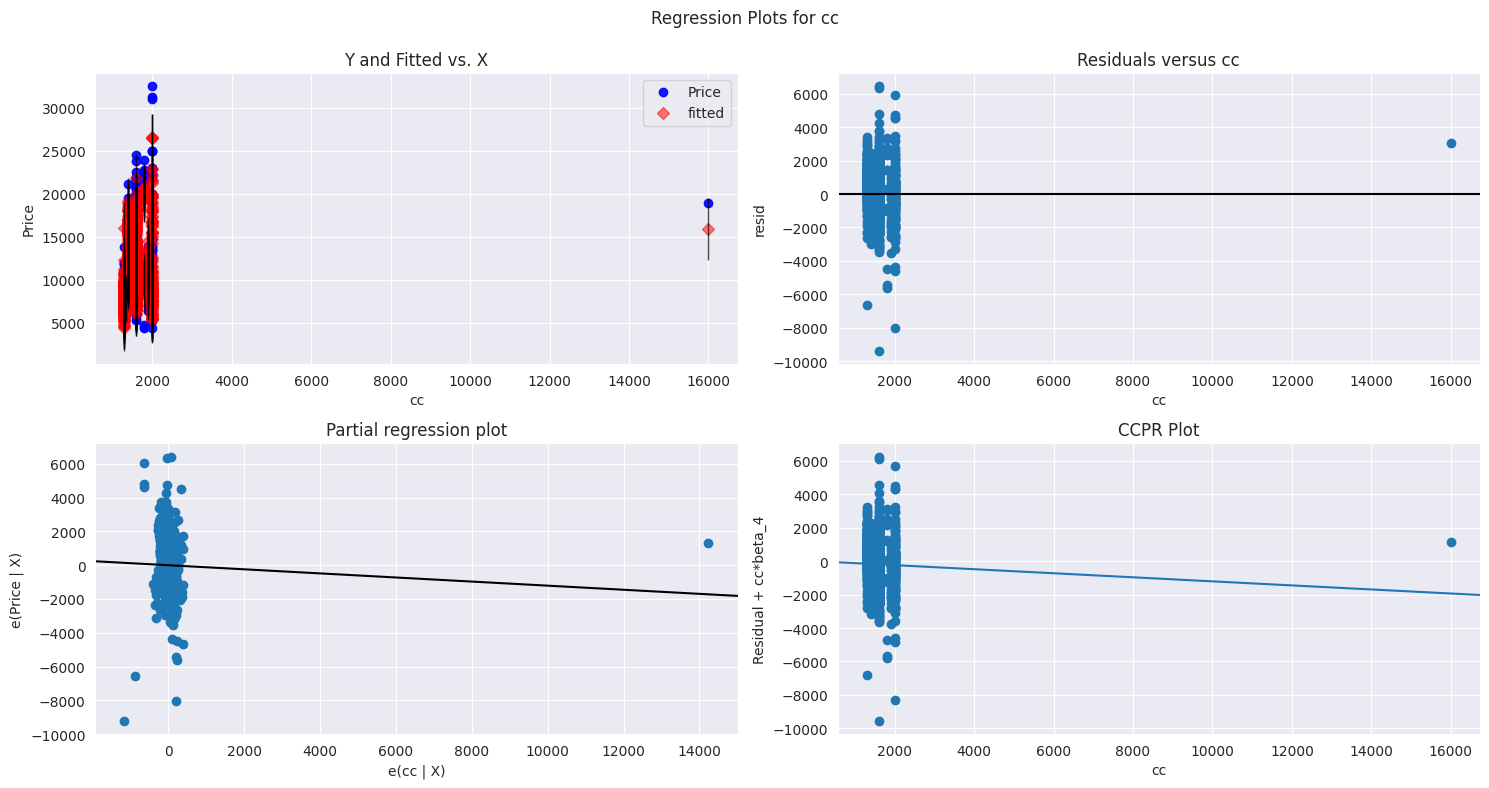

In [162]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

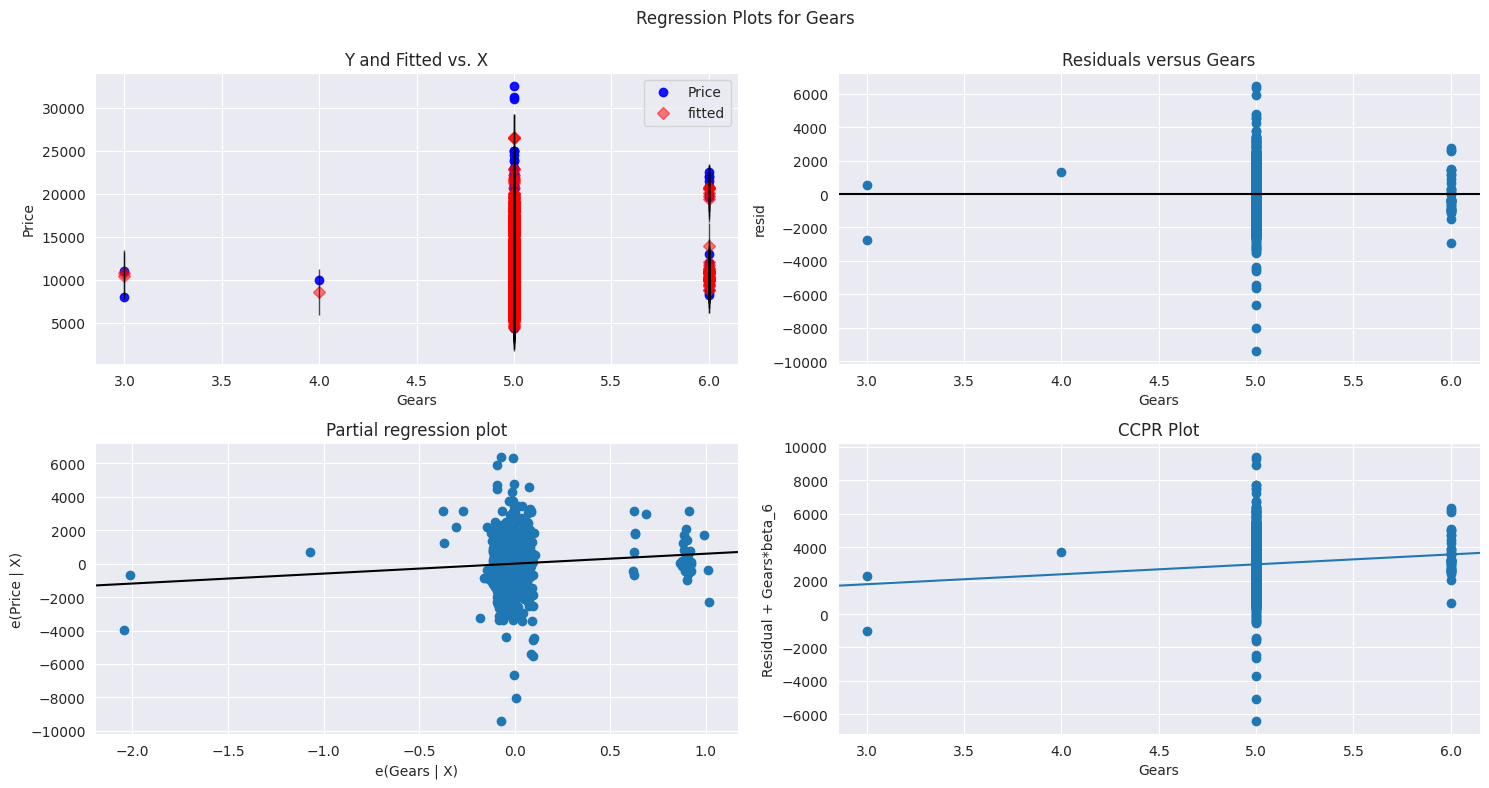

In [163]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

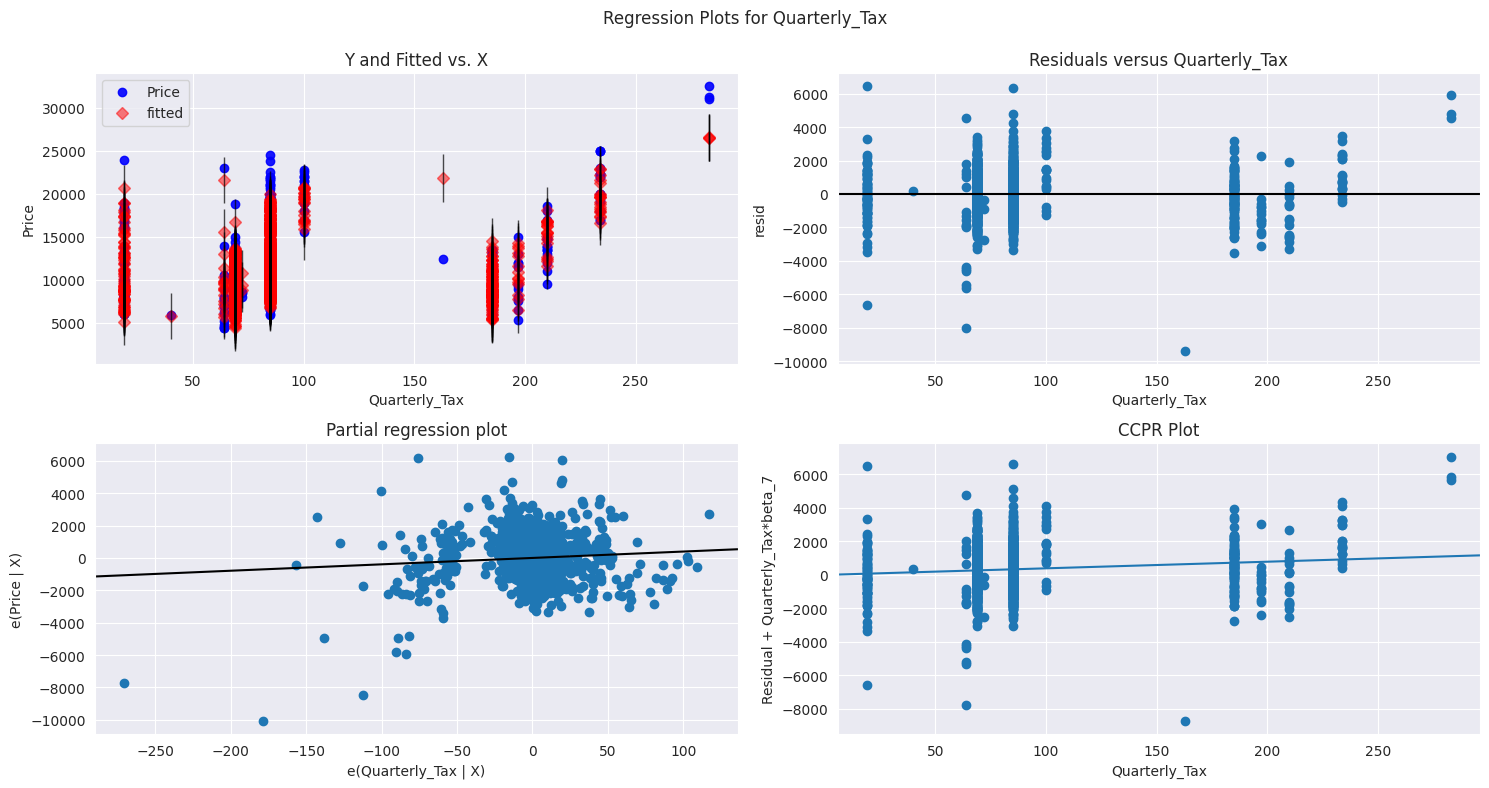

In [164]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

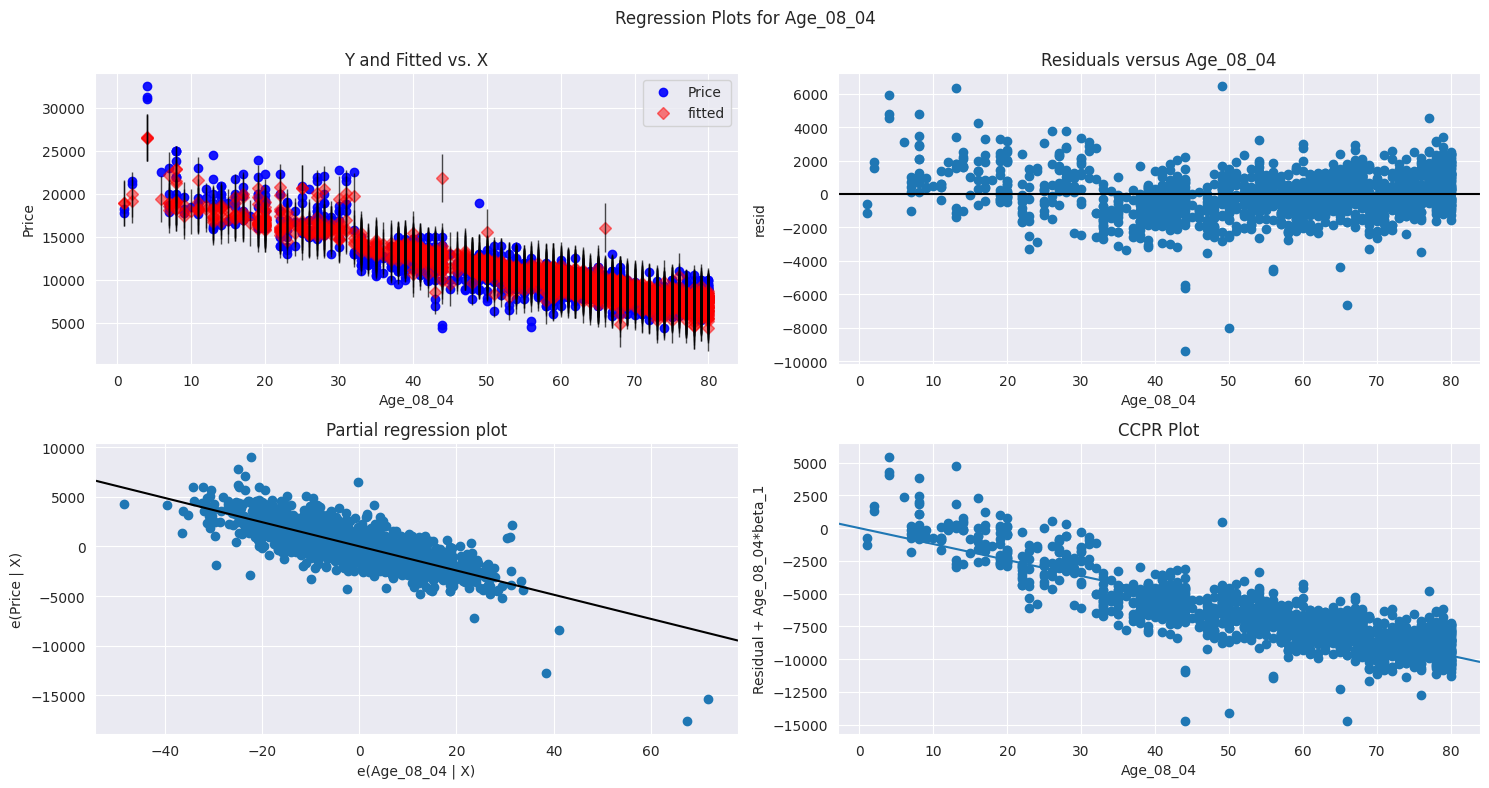

In [165]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

# **Model Deletion Diagnostics**

# **Cook’s Distance**

In [166]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

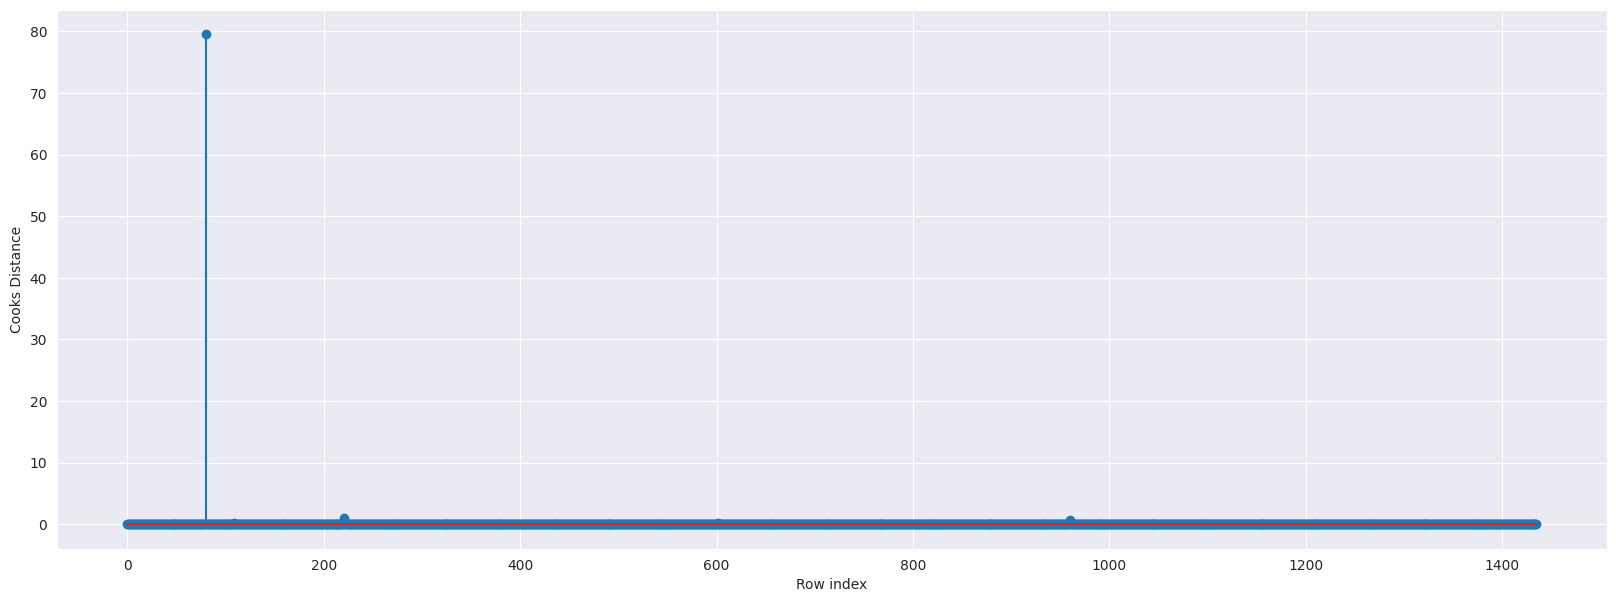

In [167]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [168]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

# **High Influence points**

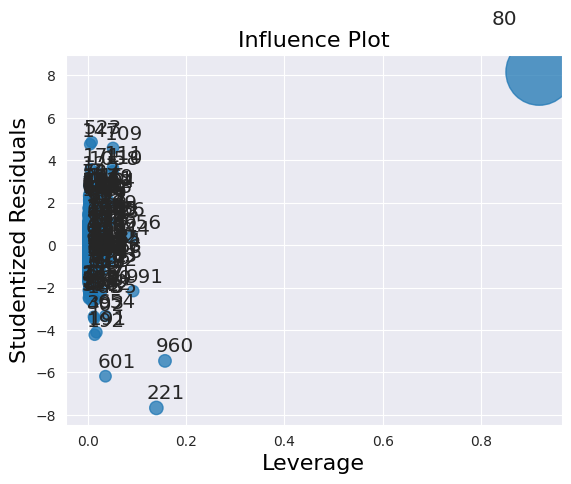

In [169]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [170]:
toyota_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [171]:
k = 8
n = toyota_df.shape[0]
leverage_cutoff = 8*((k + 1)/n)
leverage_cutoff

0.05013927576601671

In [172]:
toyota_df[toyota_df.index.isin([80])]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [173]:
toyota_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


# **Improving the model**

In [174]:
toyota_new = toyota_df.copy()

In [175]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_new1=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index()

toyota_new1.head()

,index,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750


In [176]:
#Drop the original index
toyota_new1=toyota_new1.drop(['index'],axis=1)

# **Build Model**

In [177]:
#Exclude variable "Doors"
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyota_new1).fit()

In [178]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:05   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
#Exclude variable "Doors"
final_model_1= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = toyota_new1).fit()

In [180]:
final_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1286.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:06   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5434.8906   1410.637     -3.853      0.000   -8202.036   -2667.745
Age_08_04      -121.6865      2.616    -46.512      0.000    -126.819    -116.554
KM               -0.0209      0.001    -16.737      0.000      -0.023      -0.018
HP               31.3562      2.807     11.170      0.000      25.850      36.863
Doors            -1.0602     40.013     -0.026      0.979     -79.551      77.430
Gears           598.5410    197.089      3.037      0.002     211.925     985.157
Quarterly_Tax     3.7658      1.301      2.894      0.004       1.214       6.318
Weight           16.6824      1.056     15.802      0.000      14.612      18.753
==============================================================================
Omnibus:                      146.861   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.897
Skew:                          -0.200   Prob(JB):                    3.64e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
model_influence_cc = final_model.get_influence()
(c, _) = model_influence_cc.cooks_distance

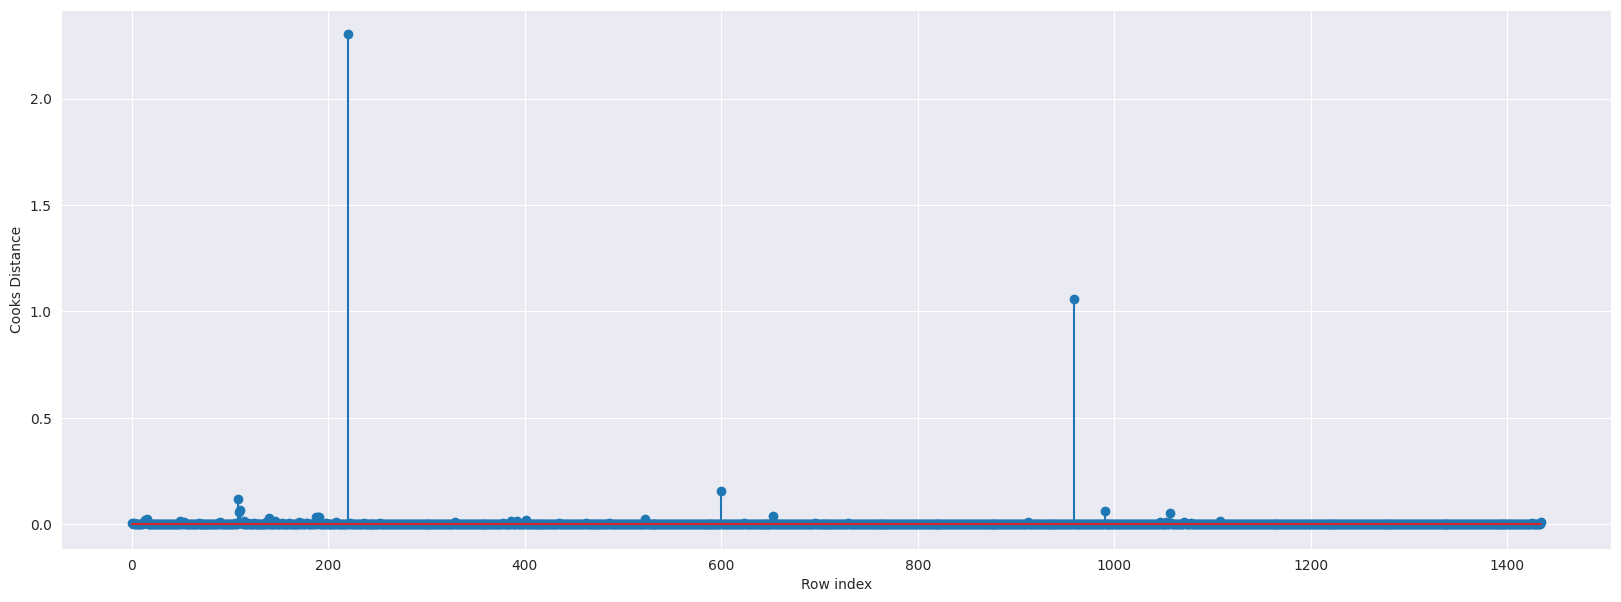

In [182]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [183]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(220, 2.3034451664540874)

In [184]:
#Drop 220
toyota_new_2=toyota_new.drop(toyota_new.index[[76]],axis=0)
toyota_new_2.shape

(1435, 9)

In [185]:
#Reset the index and re arrange the row values
toyota_new_3=toyota_new_2.reset_index()

In [186]:
toyota_new_4=toyota_new_3.drop(['index'],axis=1)

In [187]:
#Build the model on the new data
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyota_new_4).fit()

In [188]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1292.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:06   Log-Likelihood:                -12365.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5539.7376   1408.329     -3.934      0.000   -8302.356   -2777.119
Age_08_04      -121.5951      2.612    -46.560      0.000    -126.718    -116.472
KM               -0.0208      0.001    -16.631      0.000      -0.023      -0.018
HP               31.6809      2.807     11.287      0.000      26.175      37.187
cc               -0.1204      0.090     -1.338      0.181      -0.297       0.056
Gears           597.4606    193.160      3.093      0.002     218.553     976.368
Quarterly_Tax     3.9945      1.304      3.062      0.002       1.436       6.553
Weight           16.8949      1.032     16.366      0.000      14.870      18.920
==============================================================================
Omnibus:                      151.158   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.747
Skew:                          -0.214   Prob(JB):                    3.30e-220
Kurtosis:                       7.089   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
#Again check for influencers
model_influence_cc = final_model.get_influence()
(c, _) = model_influence_cc.cooks_distance

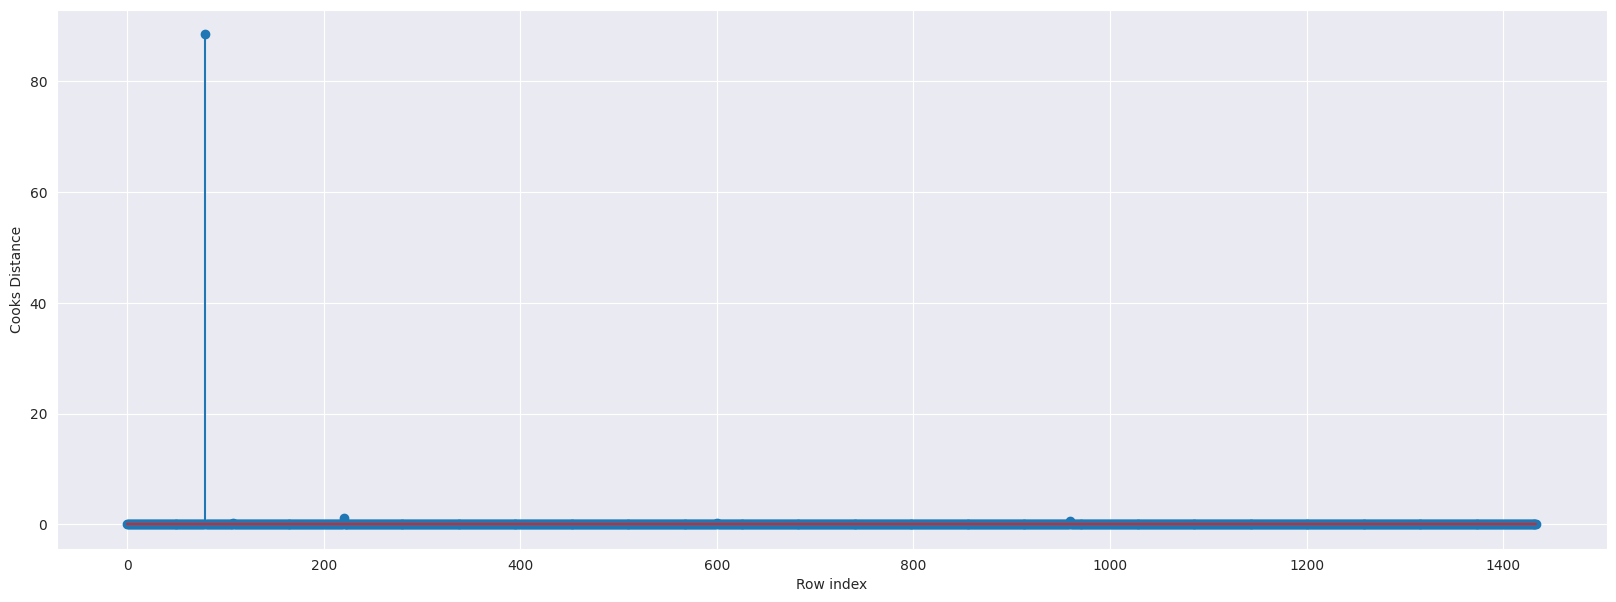

In [190]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_new_4)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [191]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(79, 88.52718491721548)

In [192]:
toyota_new_5=toyota_new_4.drop(toyota_new_4.index[[79]],axis=0)
toyota_new_5

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500
1431,72,19000,86,1300,3,5,69,1015,10845
1432,71,17016,86,1300,3,5,69,1015,8500
1433,70,16916,86,1300,3,5,69,1015,7250


In [193]:
toyota_new_6=toyota_new_5.reset_index()
toyota_new_6


,index,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750
2,2,24,41711,90,2000,3,5,210,1165,13950
3,3,26,48000,90,2000,3,5,210,1165,14950
4,4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...,...
1429,1430,69,20544,86,1300,3,5,69,1025,7500
1430,1431,72,19000,86,1300,3,5,69,1015,10845
1431,1432,71,17016,86,1300,3,5,69,1015,8500
1432,1433,70,16916,86,1300,3,5,69,1015,7250


In [194]:
toyota_new_7=toyota_new_6.drop(['index'],axis=1)
toyota_new_7

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,7500
1430,72,19000,86,1300,3,5,69,1015,10845
1431,71,17016,86,1300,3,5,69,1015,8500
1432,70,16916,86,1300,3,5,69,1015,7250


In [195]:
#Check the accuracy of the mode
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyota_new_7).fit()

In [196]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:07   Log-Likelihood:                -12324.
No. Observations:                1434   AIC:                         2.466e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6278.6019   1380.100     -4.549      0.000   -8985.846   -3571.358
Age_08_04      -120.3942      2.558    -47.066      0.000    -125.412    -115.376
KM               -0.0179      0.001    -14.022      0.000      -0.020      -0.015
HP               39.1693      2.894     13.533      0.000      33.492      44.847
cc               -2.5068      0.306     -8.199      0.000      -3.107      -1.907
Gears           551.3531    188.964      2.918      0.004     180.677     922.030
Quarterly_Tax     9.1188      1.422      6.413      0.000       6.329      11.908
Weight           19.9099      1.075     18.519      0.000      17.801      22.019
==============================================================================
Omnibus:                      238.867   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2552.055
Skew:                          -0.421   Prob(JB):                         0.00
Kurtosis:                       9.481   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
model_influence_cc = final_model.get_influence()
(c, _) = model_influence_cc.cooks_distance

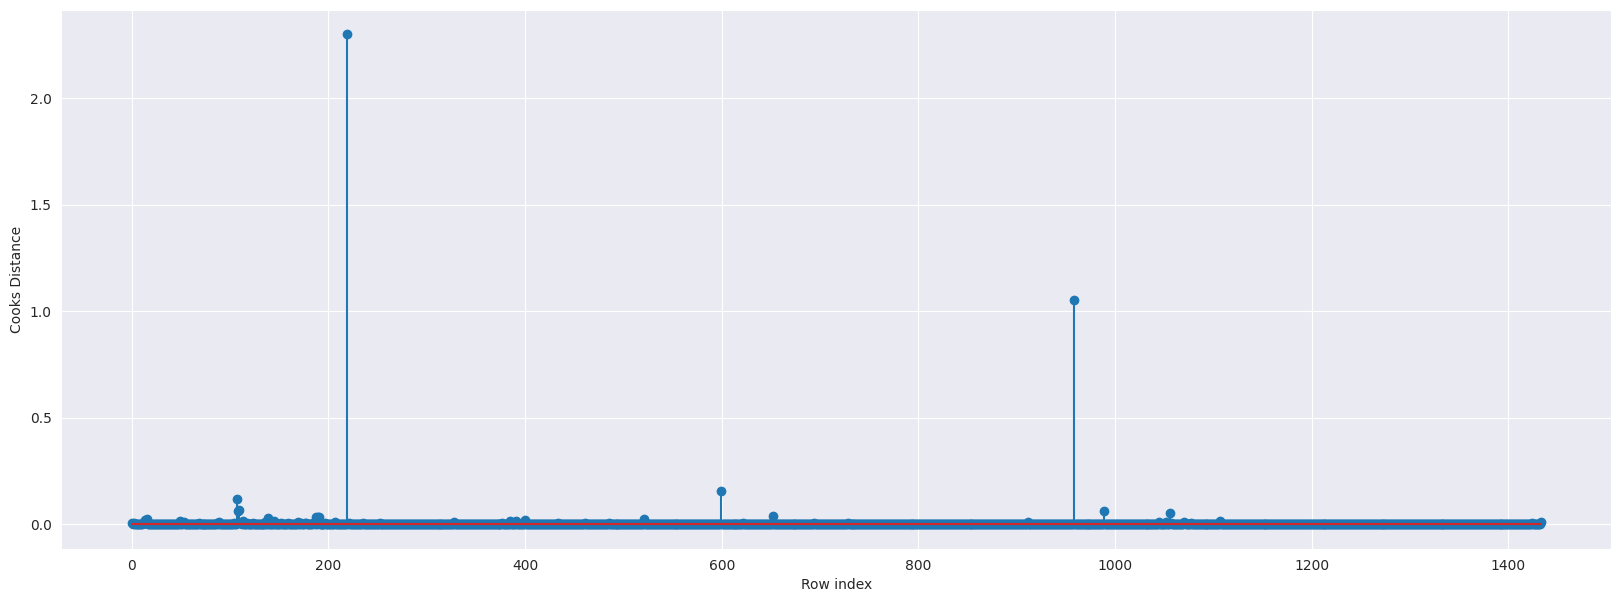

In [198]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [199]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(219, 2.3001611887968814)

In [200]:
toyota_new_8=toyota_new_7.drop(toyota_new_7.index[[219]],axis=0)
toyota_new_8

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,7500
1430,72,19000,86,1300,3,5,69,1015,10845
1431,71,17016,86,1300,3,5,69,1015,8500
1432,70,16916,86,1300,3,5,69,1015,7250


In [201]:
toyota_new_9=toyota_new_8.reset_index()


In [202]:
toyota_new_10=toyota_new_9.drop(['index'],axis=1)
toyota_new_10

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1428,69,20544,86,1300,3,5,69,1025,7500
1429,72,19000,86,1300,3,5,69,1015,10845
1430,71,17016,86,1300,3,5,69,1015,8500
1431,70,16916,86,1300,3,5,69,1015,7250


In [203]:
#Check the accuracy of the mode
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyota_new_10).fit()

In [204]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1459.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:08   Log-Likelihood:                -12269.
No. Observations:                1433   AIC:                         2.455e+04
Df Residuals:                    1425   BIC:                         2.460e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.021e+04   1395.016     -7.319      0.000   -1.29e+04   -7473.777
Age_08_04      -116.5999      2.507    -46.516      0.000    -121.517    -111.683
KM               -0.0174      0.001    -14.067      0.000      -0.020      -0.015
HP               38.8599      2.802     13.867      0.000      33.363      44.357
cc               -3.1512      0.303    -10.392      0.000      -3.746      -2.556
Gears           548.5656    182.953      2.998      0.003     189.679     907.453
Quarterly_Tax     8.1043      1.381      5.870      0.000       5.396      10.813
Weight           24.4216      1.138     21.460      0.000      22.189      26.654
==============================================================================
Omnibus:                      180.864   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1477.019
Skew:                          -0.274   Prob(JB):                         0.00
Kurtosis:                       7.943   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
model_influence_cc = final_model.get_influence()
(c, _) = model_influence_cc.cooks_distance

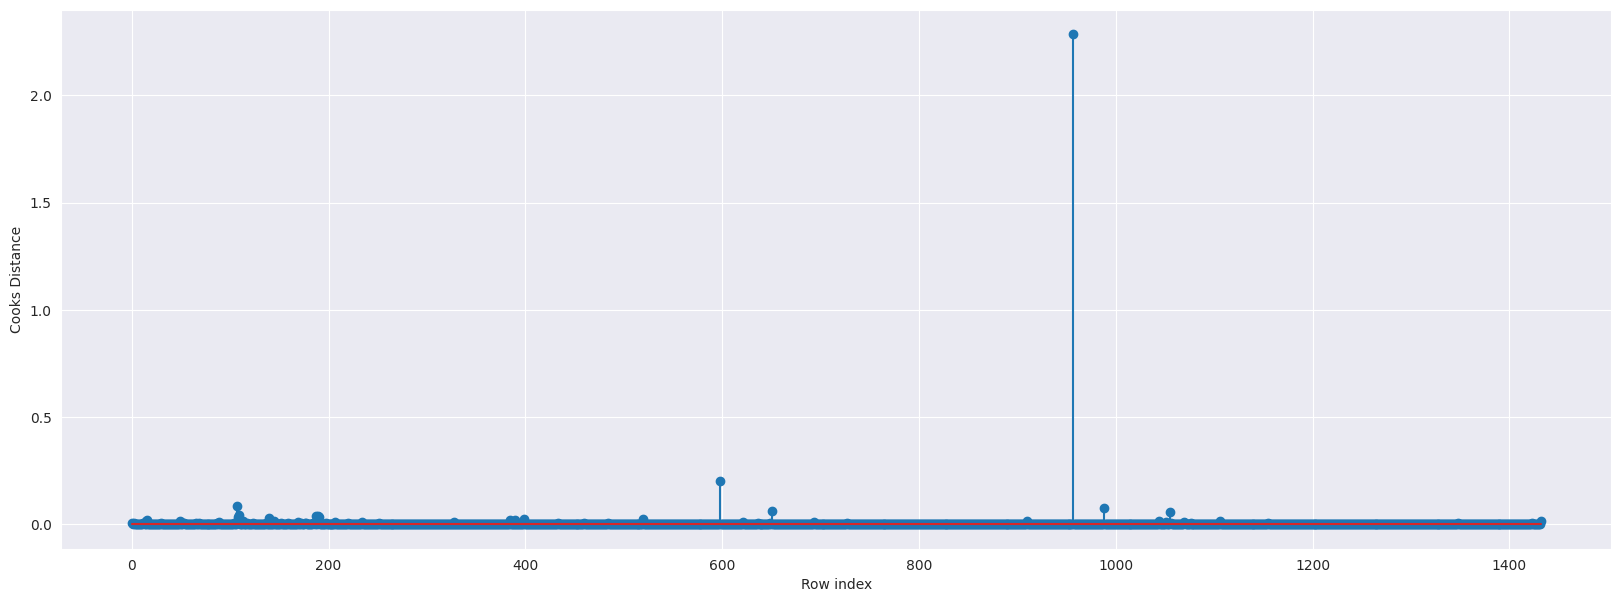

In [206]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [207]:
(np.argmax(c),np.max(c))

(957, 2.2851379363635)

In [208]:
toyota_new_11=toyota_new_10.drop(toyota_new_10.index[[957]],axis=0)
toyota_new_11

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1428,69,20544,86,1300,3,5,69,1025,7500
1429,72,19000,86,1300,3,5,69,1015,10845
1430,71,17016,86,1300,3,5,69,1015,8500
1431,70,16916,86,1300,3,5,69,1015,7250


In [209]:
toyota_new_12=toyota_new_11.reset_index()


In [210]:
toyota_new_13=toyota_new_12.drop(['index'],axis=1)


In [211]:
#Check the accuracy of the mode
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyota_new_13).fit()

In [212]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1555.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:09   Log-Likelihood:                -12221.
No. Observations:                1432   AIC:                         2.446e+04
Df Residuals:                    1424   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.445e+04   1434.316    -10.072      0.000   -1.73e+04   -1.16e+04
Age_08_04      -112.3643      2.482    -45.276      0.000    -117.233    -107.496
KM               -0.0172      0.001    -14.322      0.000      -0.020      -0.015
HP               35.9629      2.744     13.107      0.000      30.581      41.345
cc               -3.6636      0.300    -12.203      0.000      -4.252      -3.075
Gears           580.6604    177.955      3.263      0.001     231.578     929.743
Quarterly_Tax     5.5851      1.371      4.074      0.000       2.896       8.274
Weight           29.2265      1.226     23.834      0.000      26.821      31.632
==============================================================================
Omnibus:                      110.207   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.636
Skew:                          -0.058   Prob(JB):                    1.66e-125
Kurtosis:                       6.101   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
model_influence_cc = final_model.get_influence()
(c, _) = model_influence_cc.cooks_distance

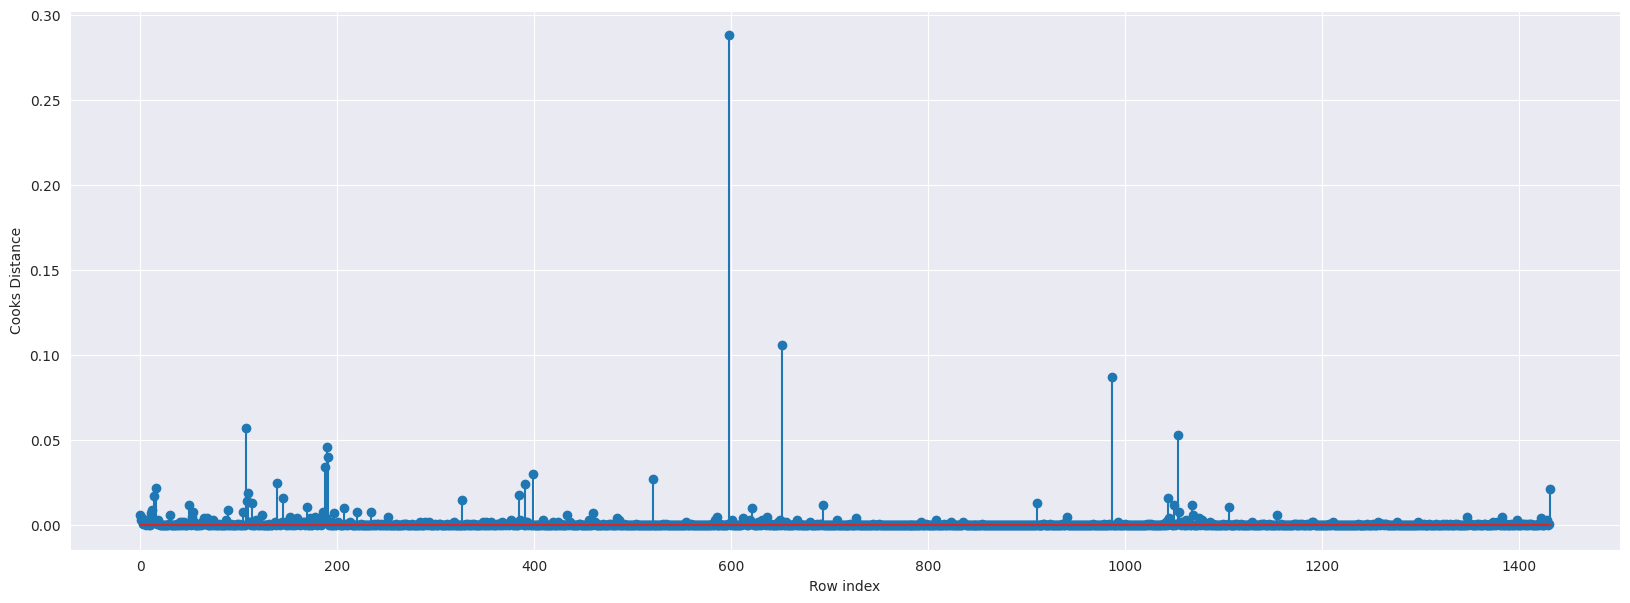

In [214]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [215]:
(np.argmax(c),np.max(c))

(598, 0.2875494103267164)

In [216]:
toyota_new_12.tail()

,index,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
1427,1428,69,20544,86,1300,3,5,69,1025,7500
1428,1429,72,19000,86,1300,3,5,69,1015,10845
1429,1430,71,17016,86,1300,3,5,69,1015,8500
1430,1431,70,16916,86,1300,3,5,69,1015,7250
1431,1432,76,1,110,1600,5,5,19,1114,6950


# **Predicting for new data**

In [217]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':40,"KM":1500,"HP":90,"cc":1250,"Doors":3,"Gears":4,"Quarterly_Tax":210,"Weight":1120},index=[1])

In [218]:
final_model.predict(new_data)

1    15919.711844
dtype: float64

In [219]:
final_model.predict(toyota_new_13.iloc[0:8,])

0    16195.979167
1    15749.769285
2    16174.314917
3    15841.451208
4    15701.472314
5    15089.871431
6    17265.741201
7    17250.577599
dtype: float64

In [220]:
toyota_df.head(10)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
5,32,61000,90,2000,3,5,210,1170,12950
6,27,94612,90,2000,3,5,210,1245,16900
7,30,75889,90,2000,3,5,210,1245,18600
8,27,19700,192,1800,3,5,100,1185,21500
9,23,71138,69,1900,3,5,185,1105,12950


In [221]:
pred_y = final_model.predict(toyota_new)

In [222]:
pred_y

0       16195.979167
1       15749.769285
2       16174.314917
3       15841.451208
4       15701.472314
            ...     
1431     9023.314105
1432     8420.504713
1433     8566.982556
1434     8681.066293
1435    10675.925151
Length: 1436, dtype: float64